In [27]:
import matplotlib
matplotlib.style.use('publication')

In [56]:
import h5py

In [29]:
from numpy import *

In [30]:
murange = array([0, 0.2, 0.4, 0.6])

In [31]:
fnames = ['data.hdf5', 'data_02.hdf5', 'data_04.hdf5', 'data_06.hdf5']

In [32]:
fnames = ['data.hdf5', 'data_02.hdf5']

In [33]:
fnames = ['0.0/data.hdf5', '0.2/data.hdf5', '0.4/data.hdf5']

In [34]:
fnames = ['0.00/data.hdf5', '0.20/data.hdf5', '0.40/data.hdf5', '0.60/data.hdf5']

In [35]:
fnames = ['4ch_adaptive_E/data.hdf5', 'adE_mu0.2/data.hdf5', 'adE_mu0.4/data.hdf5']

In [36]:
folder = 'lowthr_4ch_efirst/'

In [37]:
folder = '4ch_XHI/'

In [42]:
dfs = [h5py.File(folder+fname) for fname in fnames] 

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '4ch_XHI/4ch_adaptive_E/data.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [43]:
Trange = dfs[0].attrs['Trange']
Tkeys = list(dfs[0].keys())

In [44]:
Tkeys

['170', '199', '230', '260', '290', '320', '349', '379']

In [45]:
GG = array(dfs[0]['170']['Q']['G'])

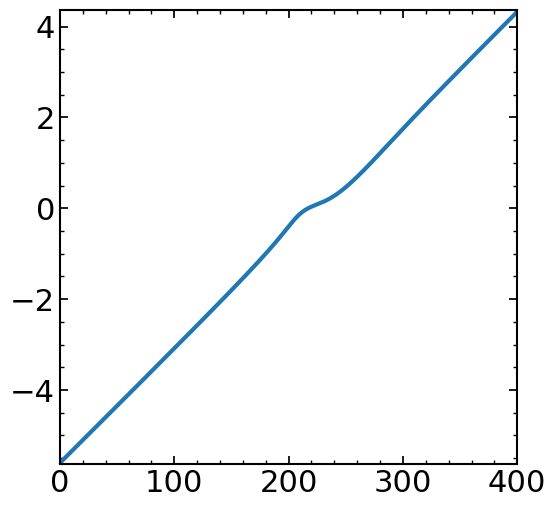

In [46]:
plt.plot(real(1/GG[:,0]))

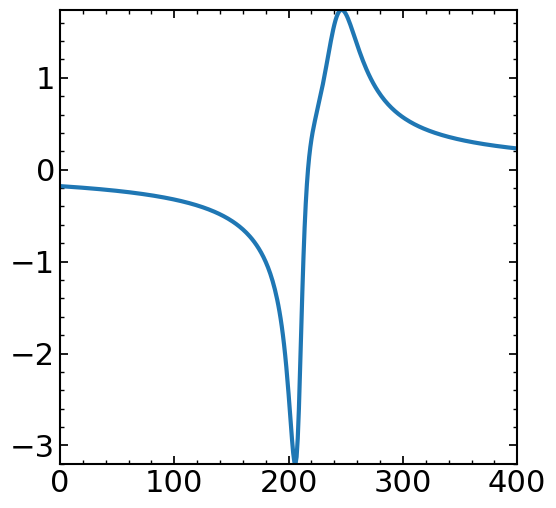

In [47]:
plt.plot(real(GG[:,0]))

In [48]:
Ps_mu = []

for df in dfs:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu += [Ps]

/tmp/ipykernel_126289/2081089261.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


In [49]:
Ps_mu = array(Ps_mu)

In [50]:
Ps_mu.shape

(4, 8)

In [51]:
from scipy.optimize import least_squares

In [52]:
def fit_func(x, muT):
    return x[0]/2 * (muT)**2 + x[1]/4*(muT)**4

In [53]:
chi_02 = (Ps_mu[1] - 2*Ps_mu[0] + Ps_mu[1]) /Trange**4 / 0.2**2

In [54]:
chi_04 = (Ps_mu[2] - 2*Ps_mu[0] + Ps_mu[2]) / Trange**4 / 0.4**2

0.170253
[ 0.10789207 -0.05903224]
0.199455
[0.13313258 0.0011794 ]
0.230475
[0.16523491 0.00085205]
0.26044
[0.09960635 0.37651127]
0.290258
[0.20195059 0.02312592]
0.320077
[ 0.2254627  -0.00297469]
0.349595
[0.23964621 0.02235454]
0.379873
[0.25330815 0.01438544]


(0.0, 0.25)

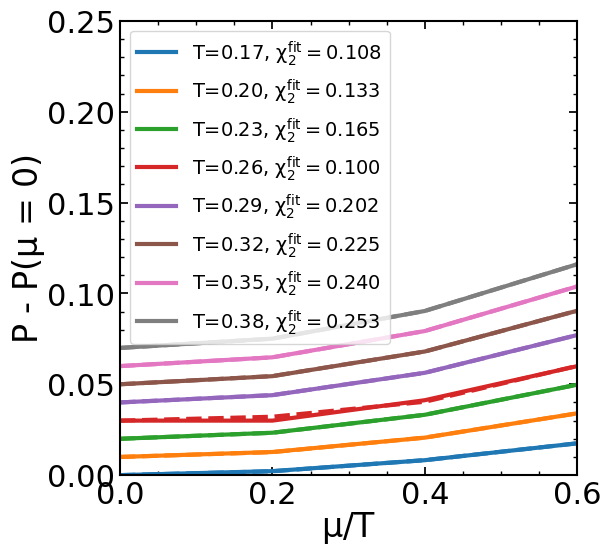

In [55]:
chis = []
for i in range(8):
    T = Trange[i]
    print(T)
    
    sol = least_squares(lambda z: fit_func(z, murange) - (Ps_mu[:, i] - Ps_mu[0, i])/T**4, [0.15, 0.2])
    sol
    
    
    print(sol.x)
    shift = 0.01*i
    l, = plt.plot(murange, shift + (Ps_mu[:, i] - Ps_mu[0, i])/T**4, label='T=%.2f, $\chi_2^{fit} = %.3f$'%(T, sol.x[0]))
    plt.plot(murange, shift + fit_func(sol.x, murange), ls='--', c=l.get_c())
    chis += [sol.x]
plt.legend(fontsize=14)

plt.xlabel('$\mu/T$')
plt.ylabel('P - P($\mu$ = 0)')
# plt.savefig('Pmu_fit.pdf', bbox_inches='tight')

plt.ylim(0, 0.25)

In [392]:
import pandas as pd

In [393]:
chiBB = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2021/chiBB.csv')

(0.0, 0.5)

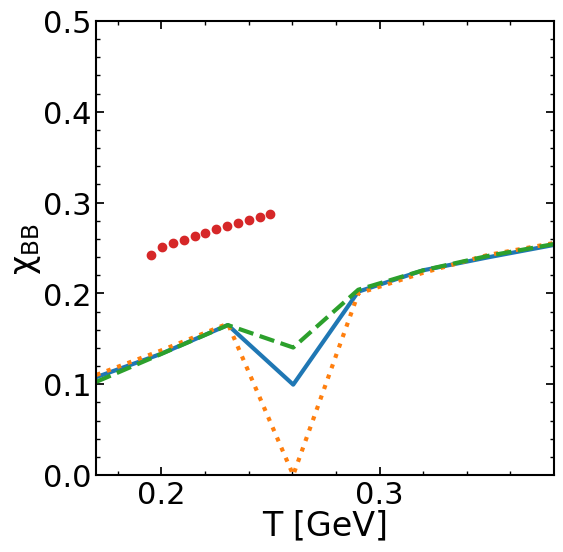

In [394]:
plt.plot(Trange, array(chis)[:, 0])
plt.plot(Trange, chi_02, ls=':')
plt.plot(Trange, chi_04, ls='--')

plt.ylabel(r'$\chi_{BB}$')
plt.plot(chiBB.x, chiBB.Curve1, ls='none', marker='o')
plt.xlabel('T [GeV]')
plt.ylim(0, 0.5)

(0.0, 1.0)

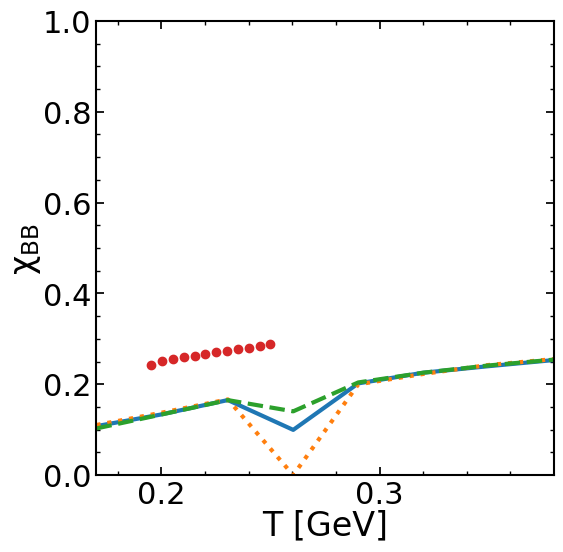

In [365]:
plt.plot(Trange, array(chis)[:, 0])
plt.plot(Trange, chi_02, ls=':')
plt.plot(Trange, chi_04, ls='--')
plt.ylabel(r'$\chi_{BB}$')
plt.plot(chiBB.x, chiBB.Curve1, ls='none', marker='o')
plt.xlabel('T [GeV]')

plt.ylim(0, 1)

In [366]:
list(dfs[0]['170'].attrs)

['G',
 'G1',
 'L',
 'P_Phi',
 'P_Phi_A',
 'P_Phi_G',
 'P_Phi_Q',
 'P_Q_A',
 'P_Q_Q',
 'P_S_A',
 'P_S_Q',
 'Ptot',
 'T',
 'erange',
 'mG',
 'mQ',
 'mu',
 'qrange',
 'screen',
 'status',
 'suppress']

In [367]:
dfs[0]['170'].attrs['erange'].shape

(201,)

## Compare two cases

In [368]:
folder2 = '4ch_XHI/'
fnames2 = ['data.hdf5', 'data_02.hdf5', 'data_04.hdf5', 'data_06.hdf5']

dfs2 = [h5py.File(folder2+fname) for fname in fnames2] 

In [369]:
Ps_mu2 = []

for df in dfs2:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu2 += [Ps]

/tmp/ipykernel_85353/1581364465.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


In [370]:
Ps_mu2 = array(Ps_mu2)

In [371]:
chi_02_2 = (Ps_mu2[1] - 2*Ps_mu2[0] + Ps_mu2[1]) /Trange**4 / 0.2**2

0.170253
0.199455
0.230475
0.26044
0.290258
0.320077
0.349595
0.379873


(0.0, 0.25)

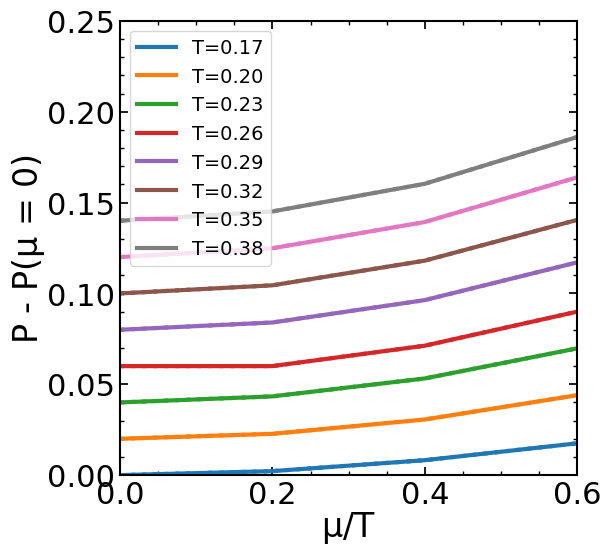

In [372]:
chis = []
for i in range(8):
    T = Trange[i]
    print(T)
    
    # sol = least_squares(lambda z: fit_func(z, murange) - (Ps_mu[:, i] - Ps_mu[0, i])/T**4, [0.15, 0.2])
    # sol
    
    
    # print(sol.x)
    shift = 0.02*i
    l, = plt.plot(murange, shift + (Ps_mu[:, i] - Ps_mu[0, i])/T**4, label='T=%.2f'%(T))
    plt.plot(murange, shift + (Ps_mu2[:, i] - Ps_mu2[0, i])/T**4, c=l.get_c(), ls=':')
    # plt.plot(murange, shift + fit_func(sol.x, murange), ls='--', c=l.get_c())
    chis += [sol.x]
plt.legend(fontsize=14)

plt.xlabel('$\mu/T$')
plt.ylabel('P - P($\mu$ = 0)')
# plt.savefig('Pmu_fit.pdf', bbox_inches='tight')

plt.ylim(0, 0.25)

(0.0, 1.0)

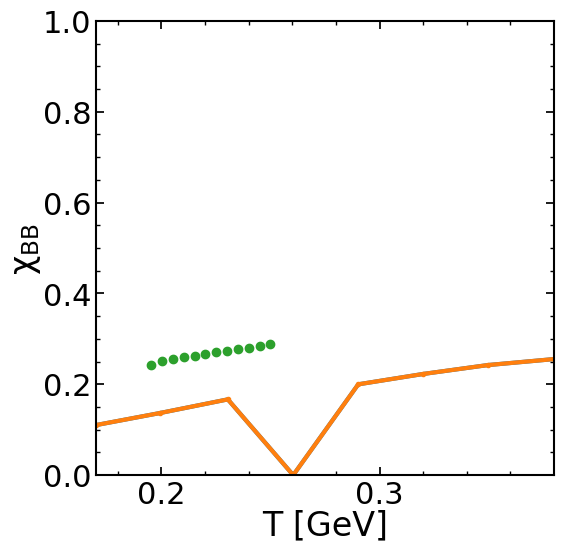

In [373]:
plt.plot(Trange, chi_02)
plt.plot(Trange, chi_02_2, marker='.')

plt.ylabel(r'$\chi_{BB}$')
plt.plot(chiBB.x, chiBB.Curve1, ls='none', marker='o')
plt.xlabel('T [GeV]')

plt.ylim(0, 1)

In [374]:
erange = dfs[0]['170'].attrs['erange']
erange2 = dfs2[0]['170'].attrs['erange']

In [375]:
dfs[0].keys()

<KeysViewHDF5 ['170', '199', '230', '260', '290', '320', '349', '379']>

In [376]:
i_mu = 1
Tlabel = '170'

In [377]:
dfs[i_mu][Tlabel].attrs['Ptot'], dfs2[i_mu][Tlabel].attrs['Ptot']

(array([0.00070367]), array([0.00071725]))

In [378]:
df_test = h5py.File('Newcalc_mu0_HI/data.hdf5')

In [379]:
df_test[Tlabel].attrs['Ptot']

array([0.00071656])

In [323]:
df_test02 = h5py.File('Newcalc_mu0_HI/data_02.hdf5')

In [327]:
df_test[Tlabel].attrs['Ptot'], dfs2[0][Tlabel].attrs['Ptot']

(array([0.00071656]), array([0.00071539]))

In [326]:
df_test02[Tlabel].attrs['Ptot'], dfs2[i_mu][Tlabel].attrs['Ptot']

(array([0.00071798]), array([0.00071725]))

In [380]:
p02 = array([v.attrs['Ptot'] for k, v in df_test02.items()]).flatten()

In [381]:
p00 = array([v.attrs['Ptot'] for k, v in df_test.items()]).flatten()

In [382]:
chi_test = (p02 - 2*p00 + p02) / Trange**4 / 0.2**2

In [383]:
chi_test

array([ 0.08402143,  0.0714288 ,  0.21467382,  0.31206301,  0.14715268,
       -0.06774816,  0.040379  ,  0.39892467])

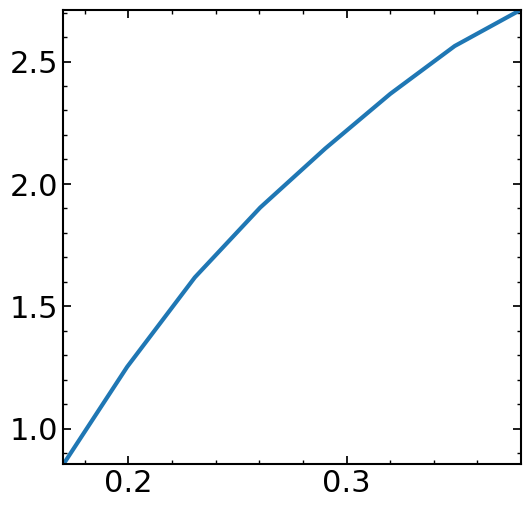

In [384]:
plt.plot(Trange, p02/Trange**4)

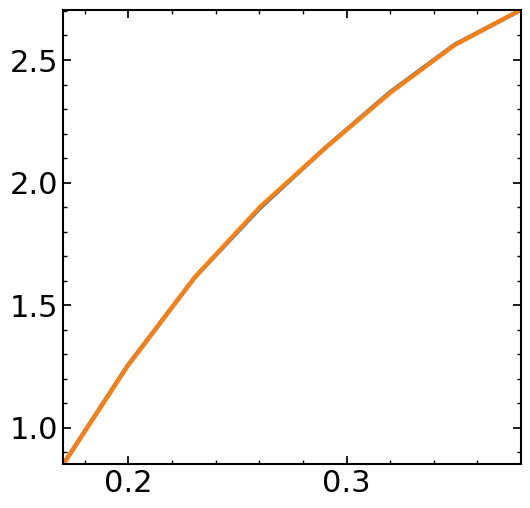

In [385]:
plt.plot(Trange, p00/Trange**4)
# plt.plot(Trange, p02/Trange**4)
plt.plot(Trange, Ps_mu2[0]/Trange**4)

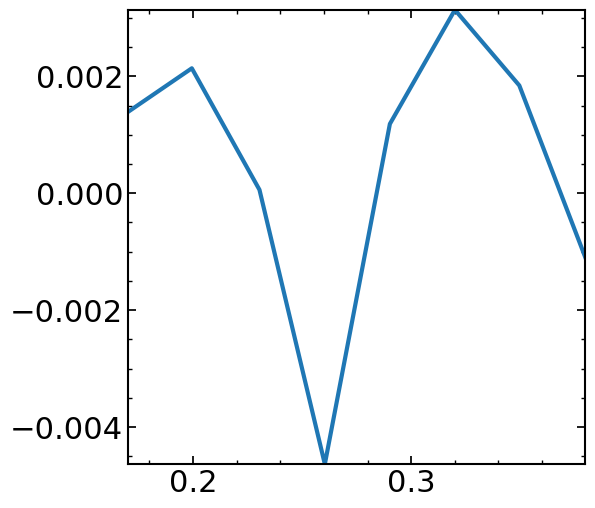

In [387]:
plt.plot(Trange, (p00 - Ps_mu2[0])/Trange**4)
# plt.plot(Trange, p02/Trange**4)
# plt.plot(Trange, Ps_mu2[0]/Trange**4)

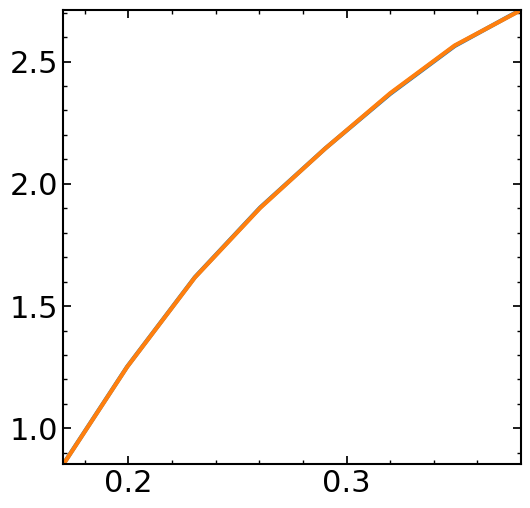

In [388]:
plt.plot(Trange, p02/Trange**4)
# plt.plot(Trange, p02/Trange**4)
plt.plot(Trange, Ps_mu2[1]/Trange**4)

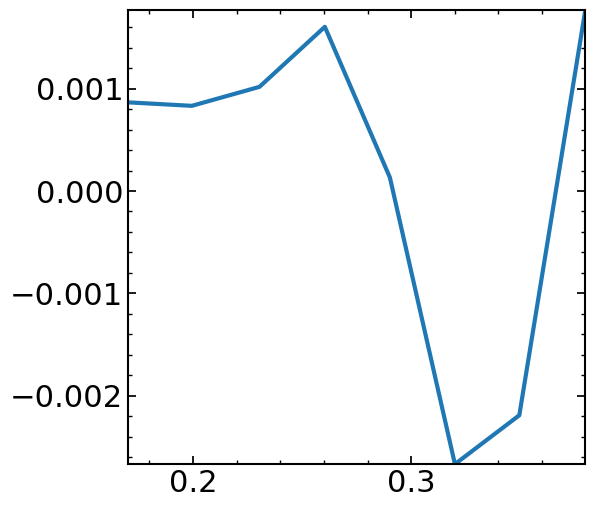

In [389]:
plt.plot(Trange, (p02 - Ps_mu2[1])/Trange**4)
# plt.plot(Trange, p02/Trange**4)
# plt.plot(Trange, Ps_mu2[0]/Trange**4)

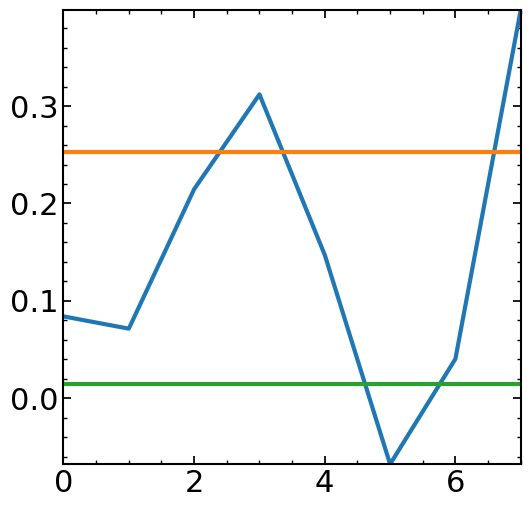

In [390]:
plt.plot(chi_test)
plt.plot(chis)

(-1.0, 3.0)

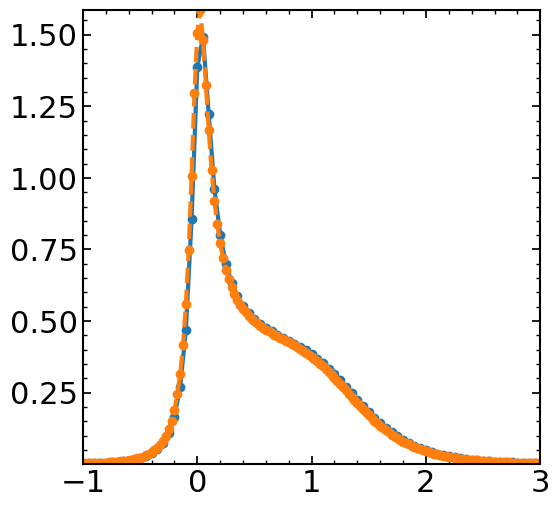

In [277]:
# plt.plot(erange, dfs[i_mu][Tlabel]['Q']['R'][:, 0], marker='o')
plt.plot(erange, df_test[Tlabel]['Q']['R'][:, 0], marker='o')
plt.plot(erange2, dfs2[i_mu][Tlabel]['Q']['R'][:, 0], ls='--', marker='o')

# plt.plot(erange, dfs[i_T]['260']['A']['R'][:, 0])
# plt.plot(erange2, dfs2[i_T]['260']['A']['R'][:, 0], ls='--')

plt.xlim(-1, 3)

(-1.0, 3.0)

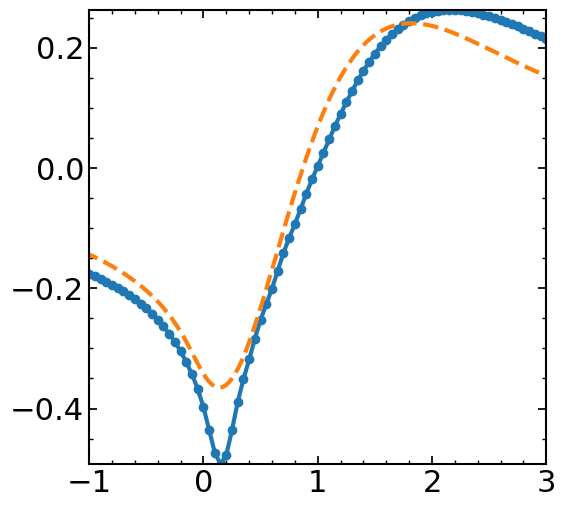

In [264]:
plt.plot(erange, dfs[i_mu][Tlabel]['Q']['S'][:, 0], marker='o')
plt.plot(erange2, dfs2[i_mu][Tlabel]['Q']['S'][:, 0], ls='--')

# plt.plot(erange, dfs[i_T]['260']['A']['R'][:, 0])
# plt.plot(erange2, dfs2[i_T]['260']['A']['R'][:, 0], ls='--')

plt.xlim(-1, 3)

(-1.0, 3.0)

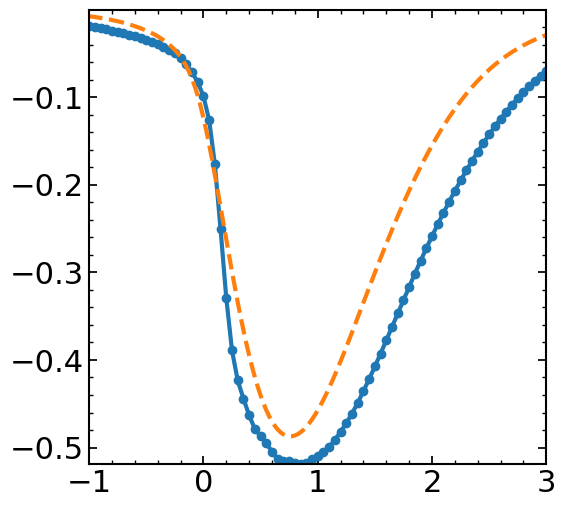

In [267]:
plt.plot(erange, imag(dfs[i_mu][Tlabel]['Q']['S'][:, 0]), marker='o')
plt.plot(erange2, imag(dfs2[i_mu][Tlabel]['Q']['S'][:, 0]), ls='--')

# plt.plot(erange, dfs[i_T]['260']['A']['R'][:, 0])
# plt.plot(erange2, dfs2[i_T]['260']['A']['R'][:, 0], ls='--')

plt.xlim(-1, 3)

(-1.0, 3.0)

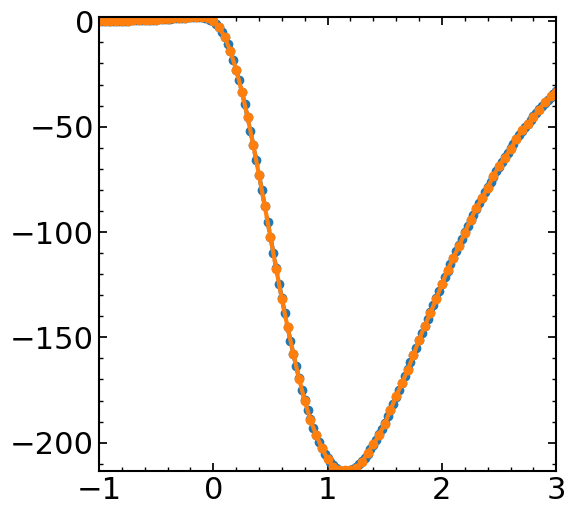

In [291]:
# plt.plot(erange, imag(dfs[i_mu][Tlabel]['TM']['qa1']['0'][:, 0]), marker='o')

plt.plot(erange2, imag(dfs2[i_mu][Tlabel]['TM']['qa1']['0'][:, 0]), ls='--', marker='o')
plt.plot(erange, imag(df_test[Tlabel]['TM']['qa1']['0'][:, 0]), marker='o')
# plt.plot(erange, dfs[i_T]['260']['A']['R'][:, 0])
# plt.plot(erange2, dfs2[i_T]['260']['A']['R'][:, 0], ls='--')

plt.xlim(-1, 3)

(-1.0, 3.0)

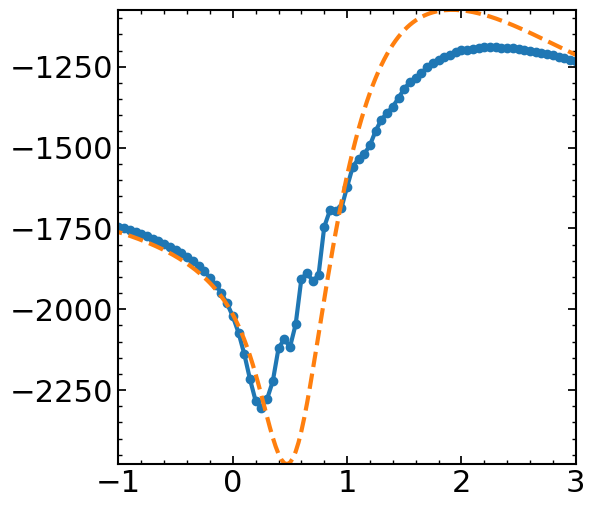

In [266]:
plt.plot(erange, dfs[i_mu][Tlabel]['TM']['qa1']['0'][:, 0], marker='o')
plt.plot(erange2, dfs2[i_mu][Tlabel]['TM']['qa1']['0'][:, 0], ls='--')

# plt.plot(erange, dfs[i_T]['260']['A']['R'][:, 0])
# plt.plot(erange2, dfs2[i_T]['260']['A']['R'][:, 0], ls='--')

plt.xlim(-1, 3)